# read csv file and plot the data measured from TS600 tensile stage using python script


In [1]:
def set_plot_style(axs, fonts, xlabel, ylabel):
    axs.set_xlabel(xlabel, fontsize=fonts)
    axs.set_ylabel(ylabel, fontsize=fonts)
    axs.tick_params(axis='both', which='major', direction='out', length=4, width=1)
    axs.tick_params(axis='both',which='minor', direction='out',width=1, length=2)  # Adjust size as needed
    #axs.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs.minorticks_on()  # Enable minor ticks
    axs.set_facecolor('white')
    axs.spines['top'].set_linewidth(1)
    axs.spines['right'].set_linewidth(1)
    axs.spines['bottom'].set_linewidth(1)
    axs.spines['left'].set_linewidth(1)
    axs.tick_params(axis='x', labelsize=fonts)
    axs.tick_params(axis='y', labelsize=fonts)
    return axs

In [11]:
import os
from cv2 import line
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



def plot_force_temperature_distance(base_path, file_keyword, T_hold_time= 140 ,temp_ylim=(25, 35), figsize=(8, 6), dpi=300):
    """
    Plots Force and Temperature vs. Time with a top axis showing Distance.

    Parameters:
    - base_path (str): Directory containing the Excel files
    - file_keyword (str): Substring to match in the filename (e.g., 'LDPE_30C')
    - temp_ylim (tuple): Y-axis limits for temperature
    - figsize (tuple): Size of the figure
    - dpi (int): Resolution of the figure
    """

    # === Locate the File ===
    matching_files = [f for f in os.listdir(base_path) if file_keyword in f and f.endswith('.xlsx')]
    if not matching_files:
        raise FileNotFoundError(f"No Excel file containing '{file_keyword}' found in {base_path}")
    
    excel_path = os.path.join(base_path, matching_files[0])
    print(f"📄 Using file: {matching_files[0]}")

    # === Load Excel and Detect Header ===
    raw_df = pd.read_excel(excel_path, header=None)
    header_row = next(i for i, row in raw_df.iterrows() if row.astype(str).str.contains('Index').any())

    # Read the actual data using the detected header row
    df = pd.read_excel(excel_path, header=header_row + 1)

    # === Extract Columns of Interest ===
    time = df.iloc[:, 1].astype(float)
    temperature = df.iloc[:, 2].astype(float)
    force = df.iloc[:, 4].astype(float)
    distance = df.iloc[:, 6].astype(float)

    # === Create the Plot ===
    fig, ax_force = plt.subplots(figsize=figsize, dpi=dpi)

    force_color = 'tab:red'
    temp_color = 'tab:blue'

    # Plot Force vs Time
    ax_force.plot(time, force, color=force_color, label='Force')
    set_plot_style(ax_force, 20, 'Time [s]', 'Force[N]')
    ax_force.tick_params(axis='y', labelcolor=force_color)
    ax_force.set_ylabel('Force [N]', color=force_color)
    # set x limits
    ax_force.set_xlim(0, 1600)

    # Plot Temperature vs Time on Secondary Y-axis
    ax_temp = ax_force.twinx()
    ax_temp.plot(time, temperature, color=temp_color, label='Temperature')
    # verticlal line for T_hold_time
    ax_temp.axvline(x=T_hold_time, color='gray', linestyle='--', label='Tensile test start', linewidth=1.5)
    set_plot_style(ax_temp, 20, 'Time [s]', 'Temperature [°C]')
    ax_temp.set_ylabel('Temperature [°C]', color=temp_color)
    ax_temp.tick_params(axis='y', labelcolor=temp_color)
    ax_temp.set_ylim(temp_ylim)
    ax_temp.grid(False)

    # Add Top X-axis for Distance
    ax_dist = ax_force.twiny()
    ax_dist.set_xlim(ax_force.get_xlim())
    time_ticks = ax_force.get_xticks()
    distance_ticks = np.interp(time_ticks, time, distance)
    ax_dist.set_xticks(time_ticks)
    ax_dist.set_xticklabels([f"{d:.1f}" for d in distance_ticks])
    ax_dist.set_xlabel('Distance [µm]')
    set_plot_style(ax_dist, 20,'Distance [µm]', '')
    ax_dist.grid(False)

    # Combine and Display Legend
    lines_force, labels_force = ax_force.get_legend_handles_labels()
    lines_temp, labels_temp = ax_temp.get_legend_handles_labels()
    ax_force.legend(lines_force + lines_temp, labels_force + labels_temp, loc='lower right', fontsize=20)

    plt.tight_layout()
    plt.show()


## Sample 

📄 Using file: Run17_LDPE_30C_50ums 24-05-25 21-40-14-02Exported.xlsx


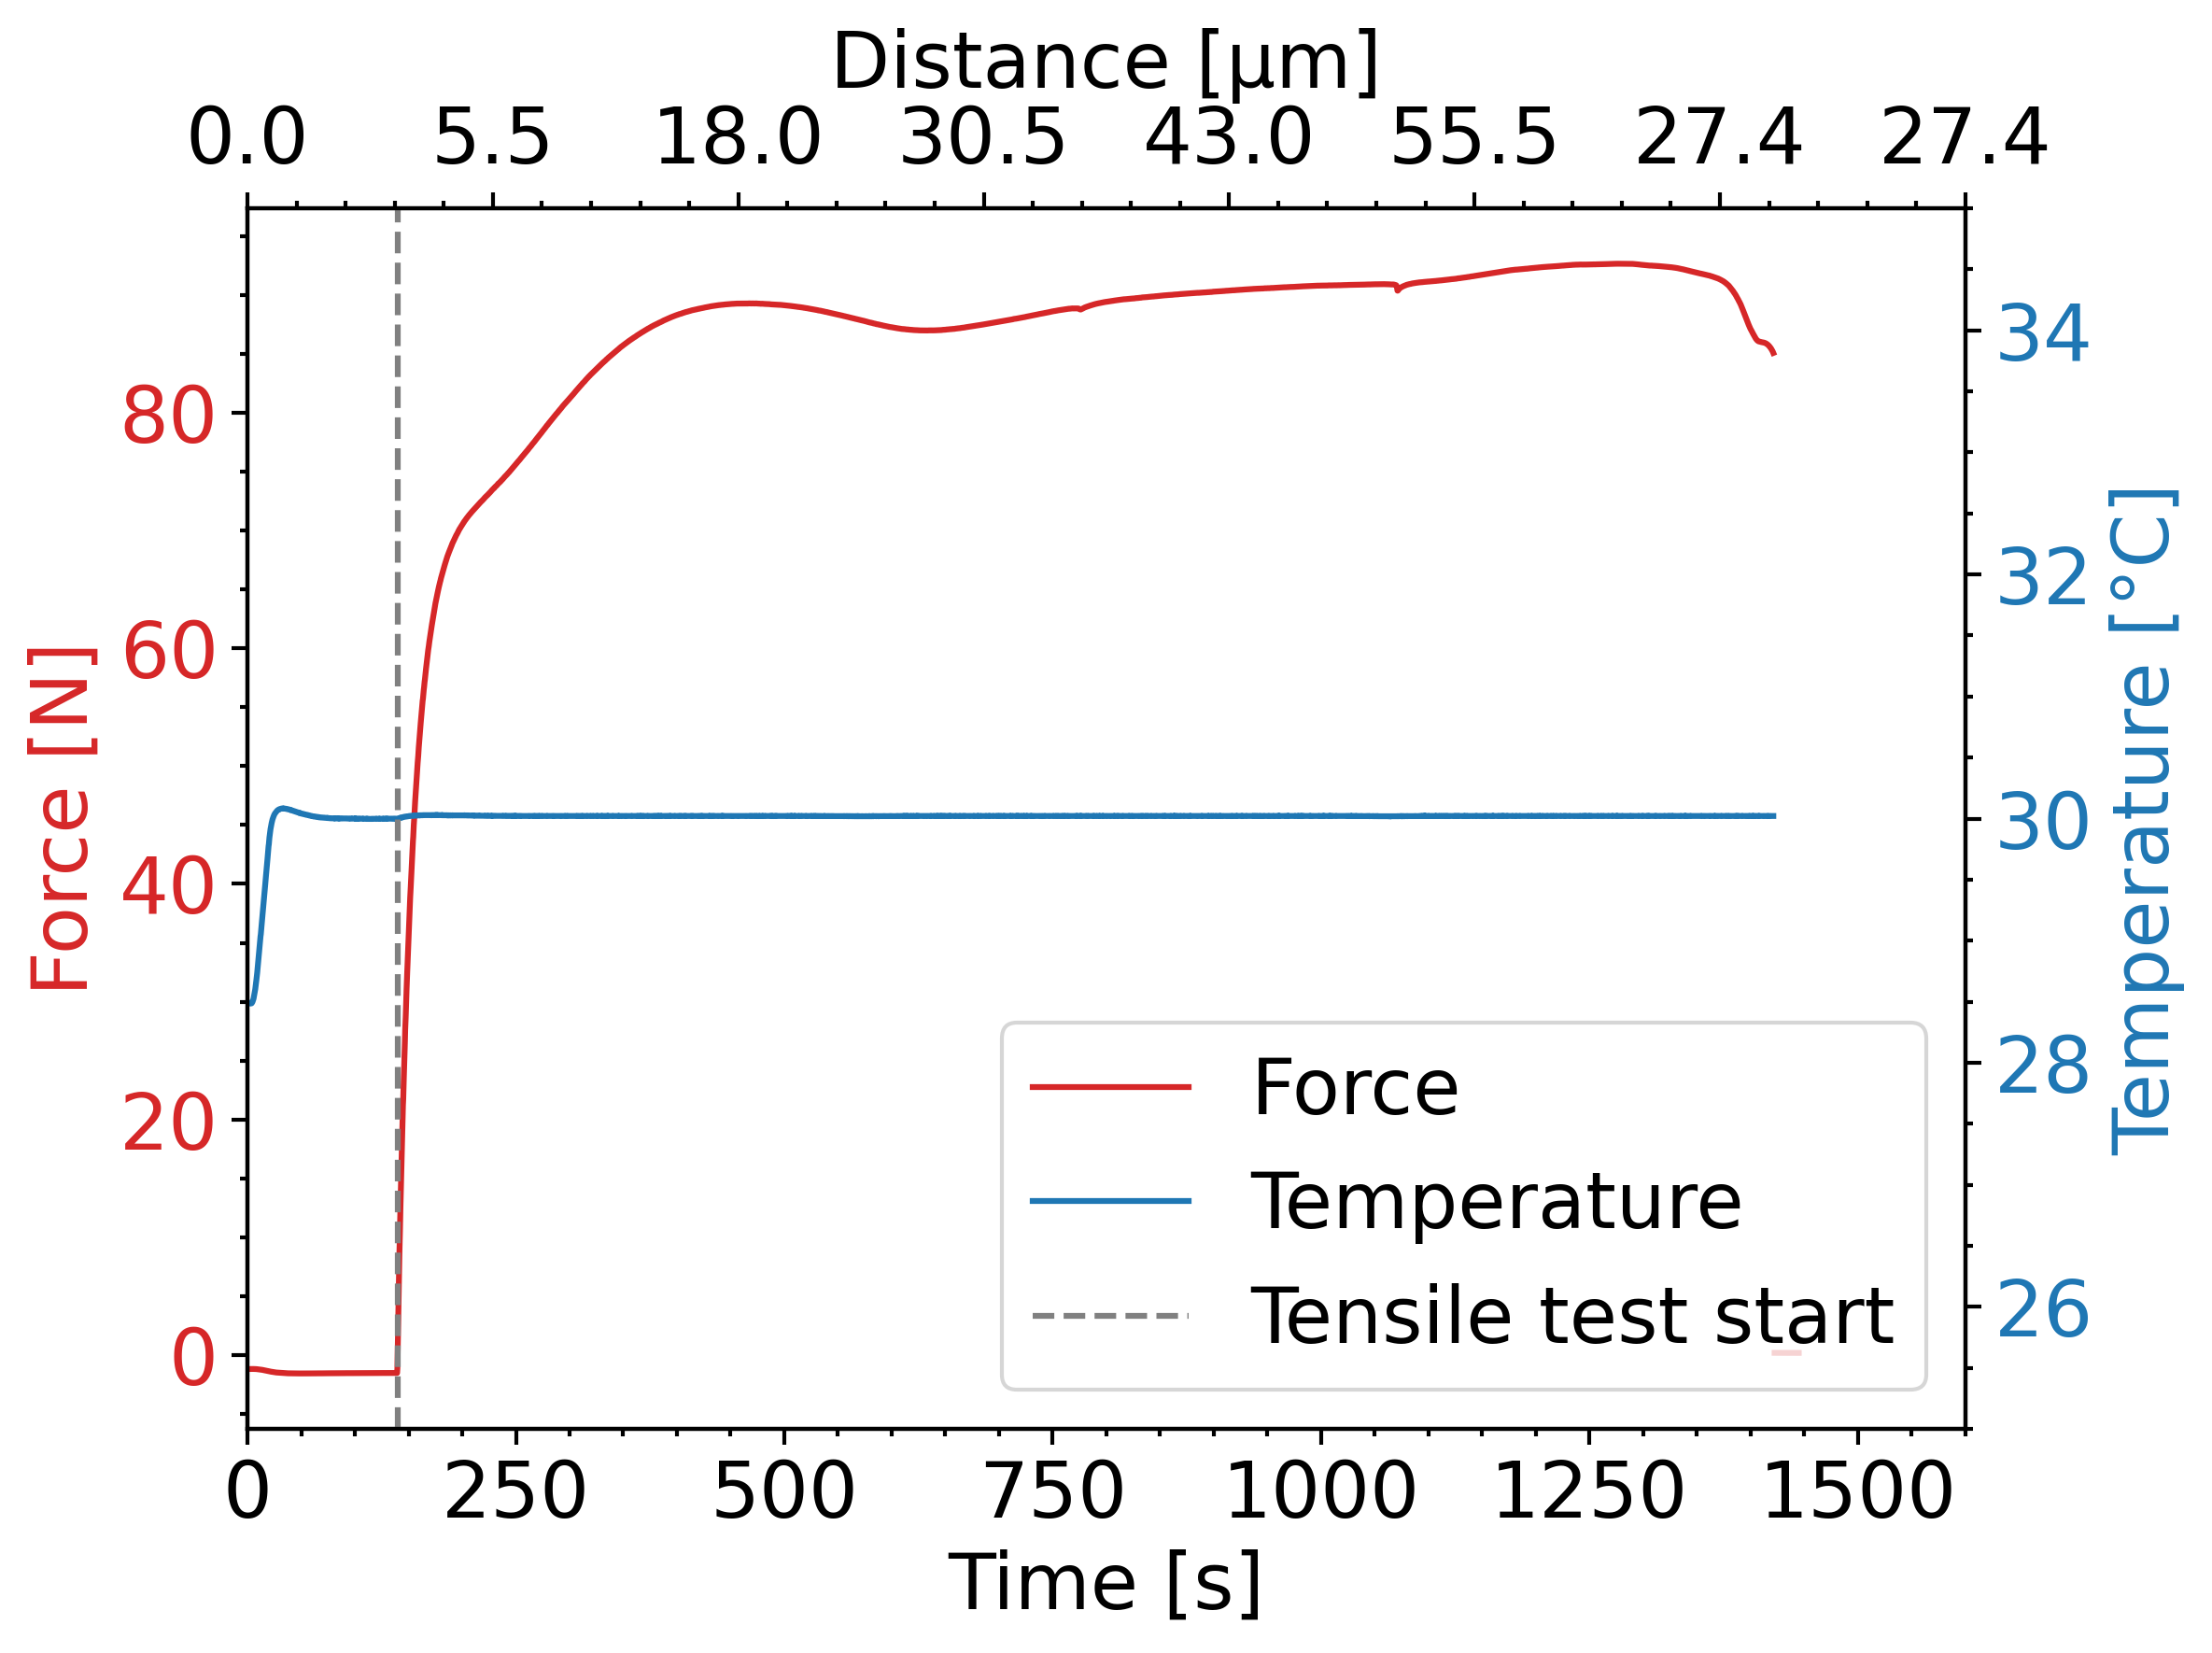

📄 Using file: Run14_LDPE_50C_50ums 24-05-25 19-44-32-94Exported.xlsx


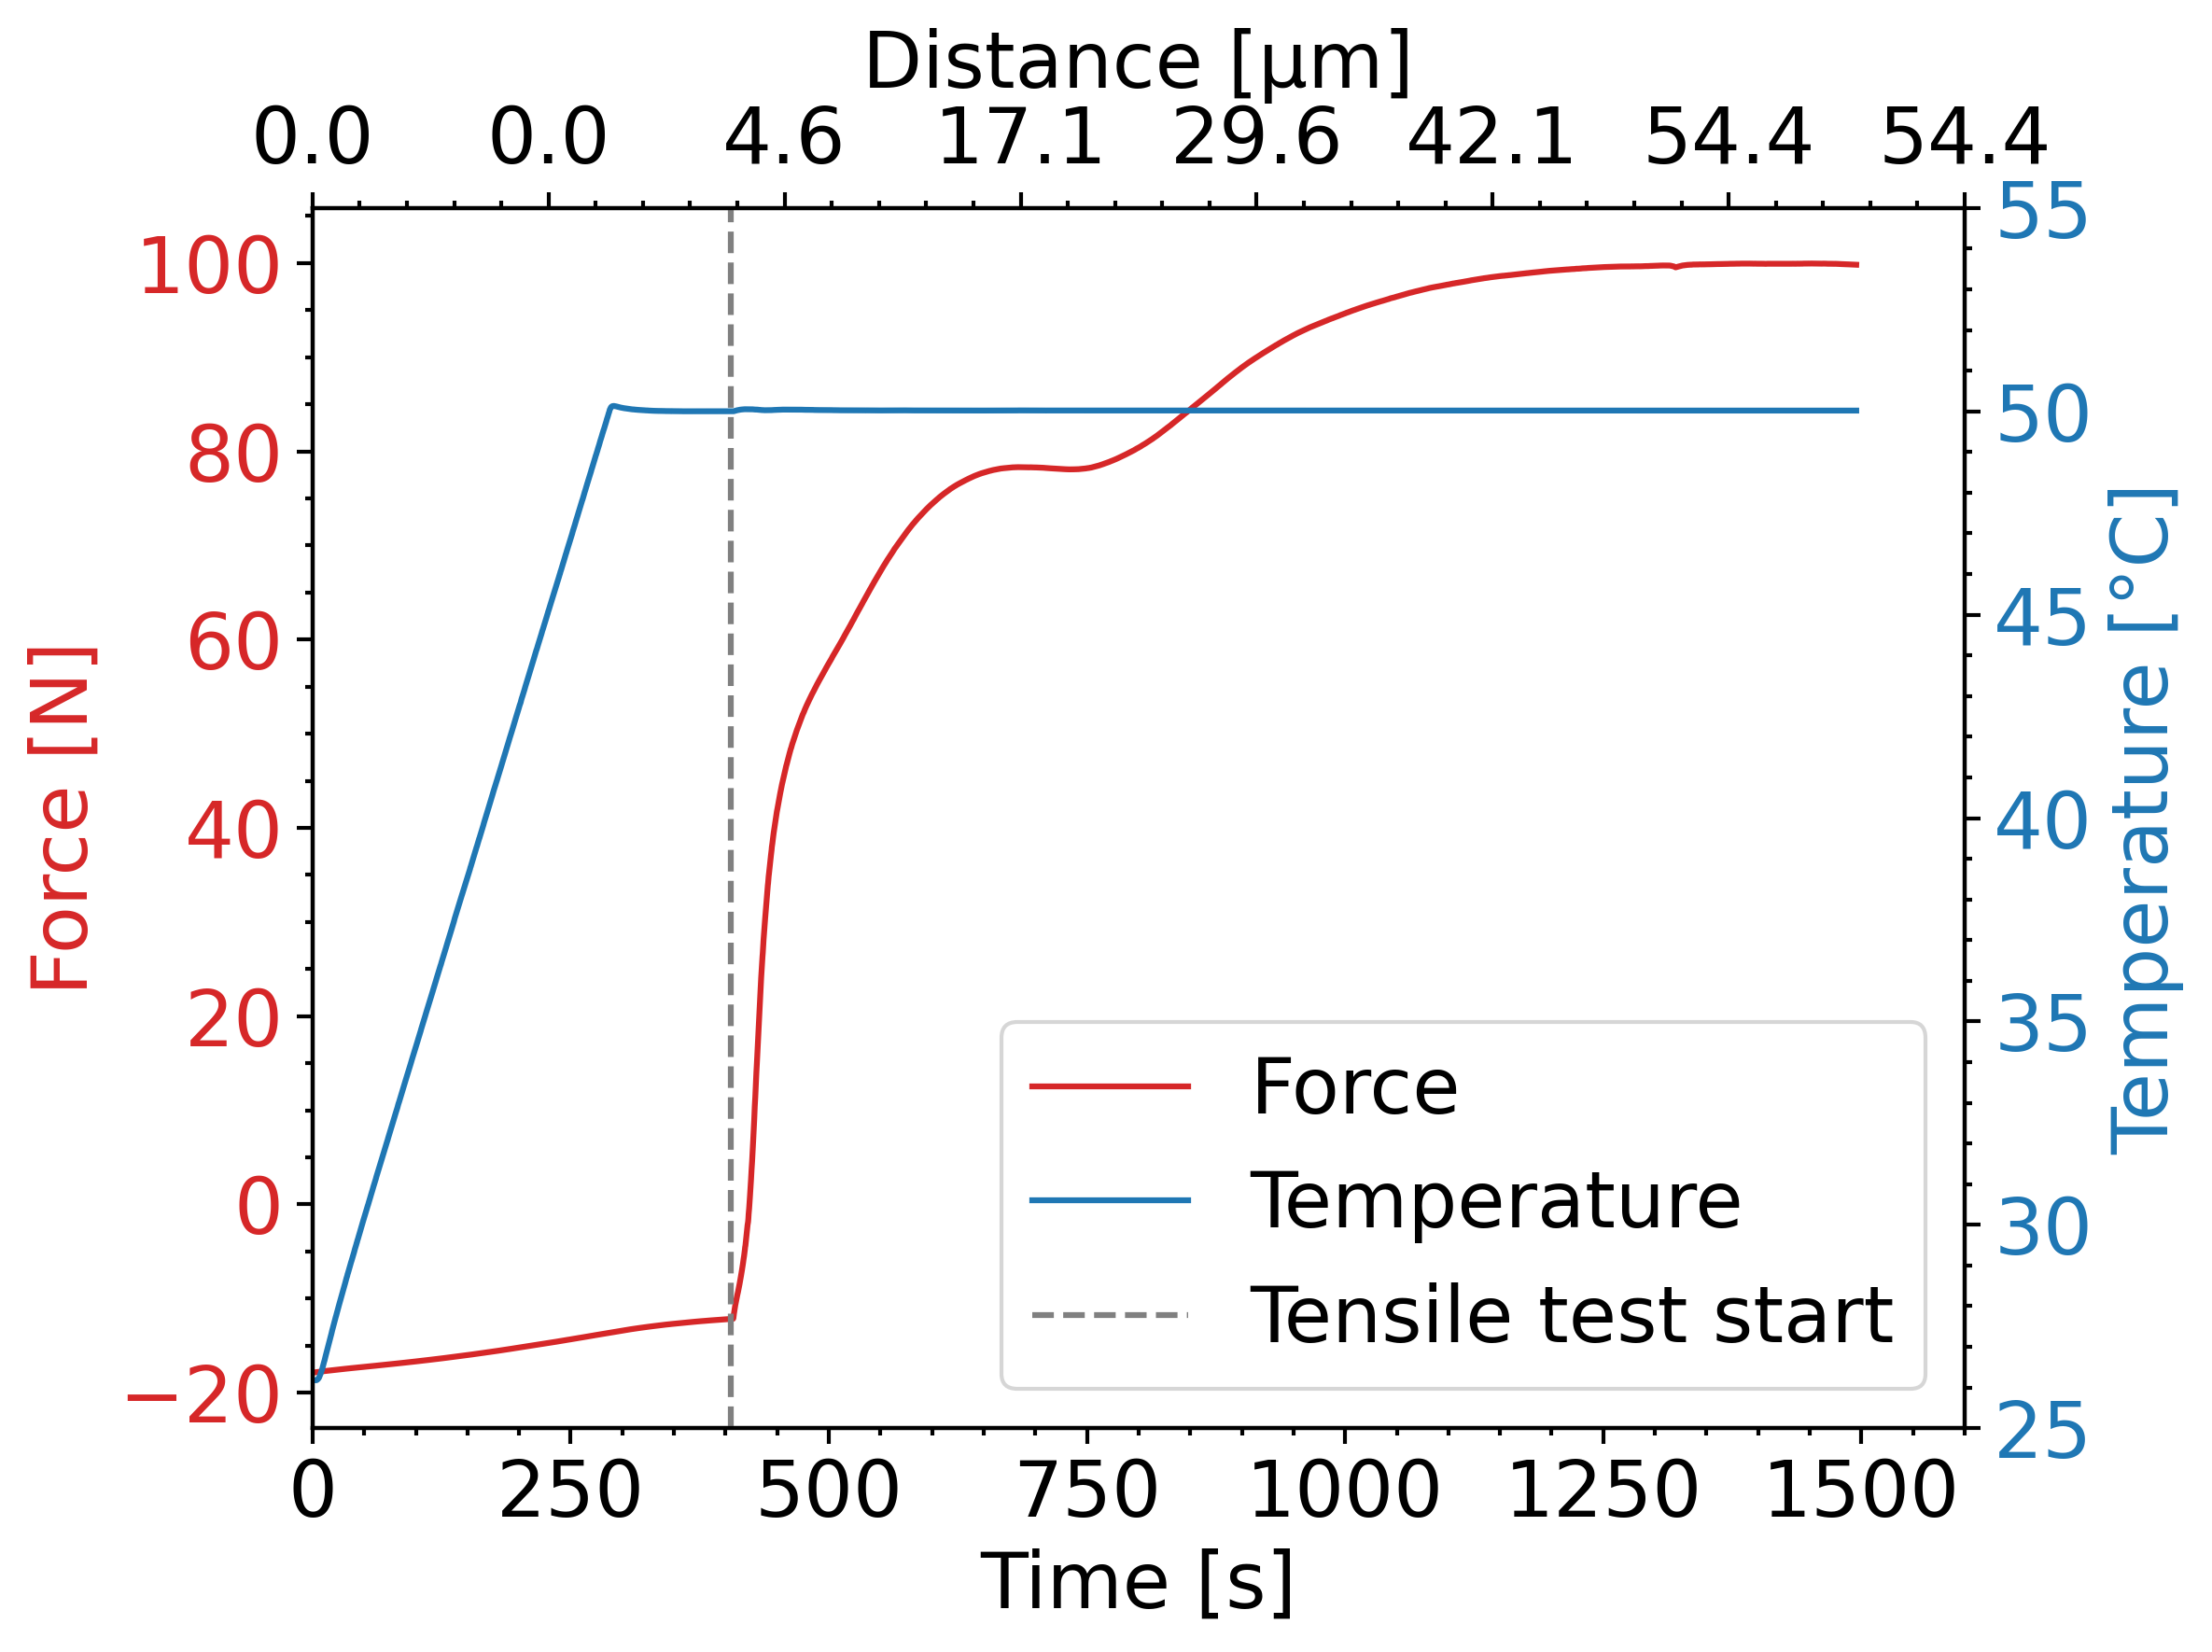

📄 Using file: Run16_LDPE_100C_50ums 24-05-25 20-55-23-90Exported.xlsx


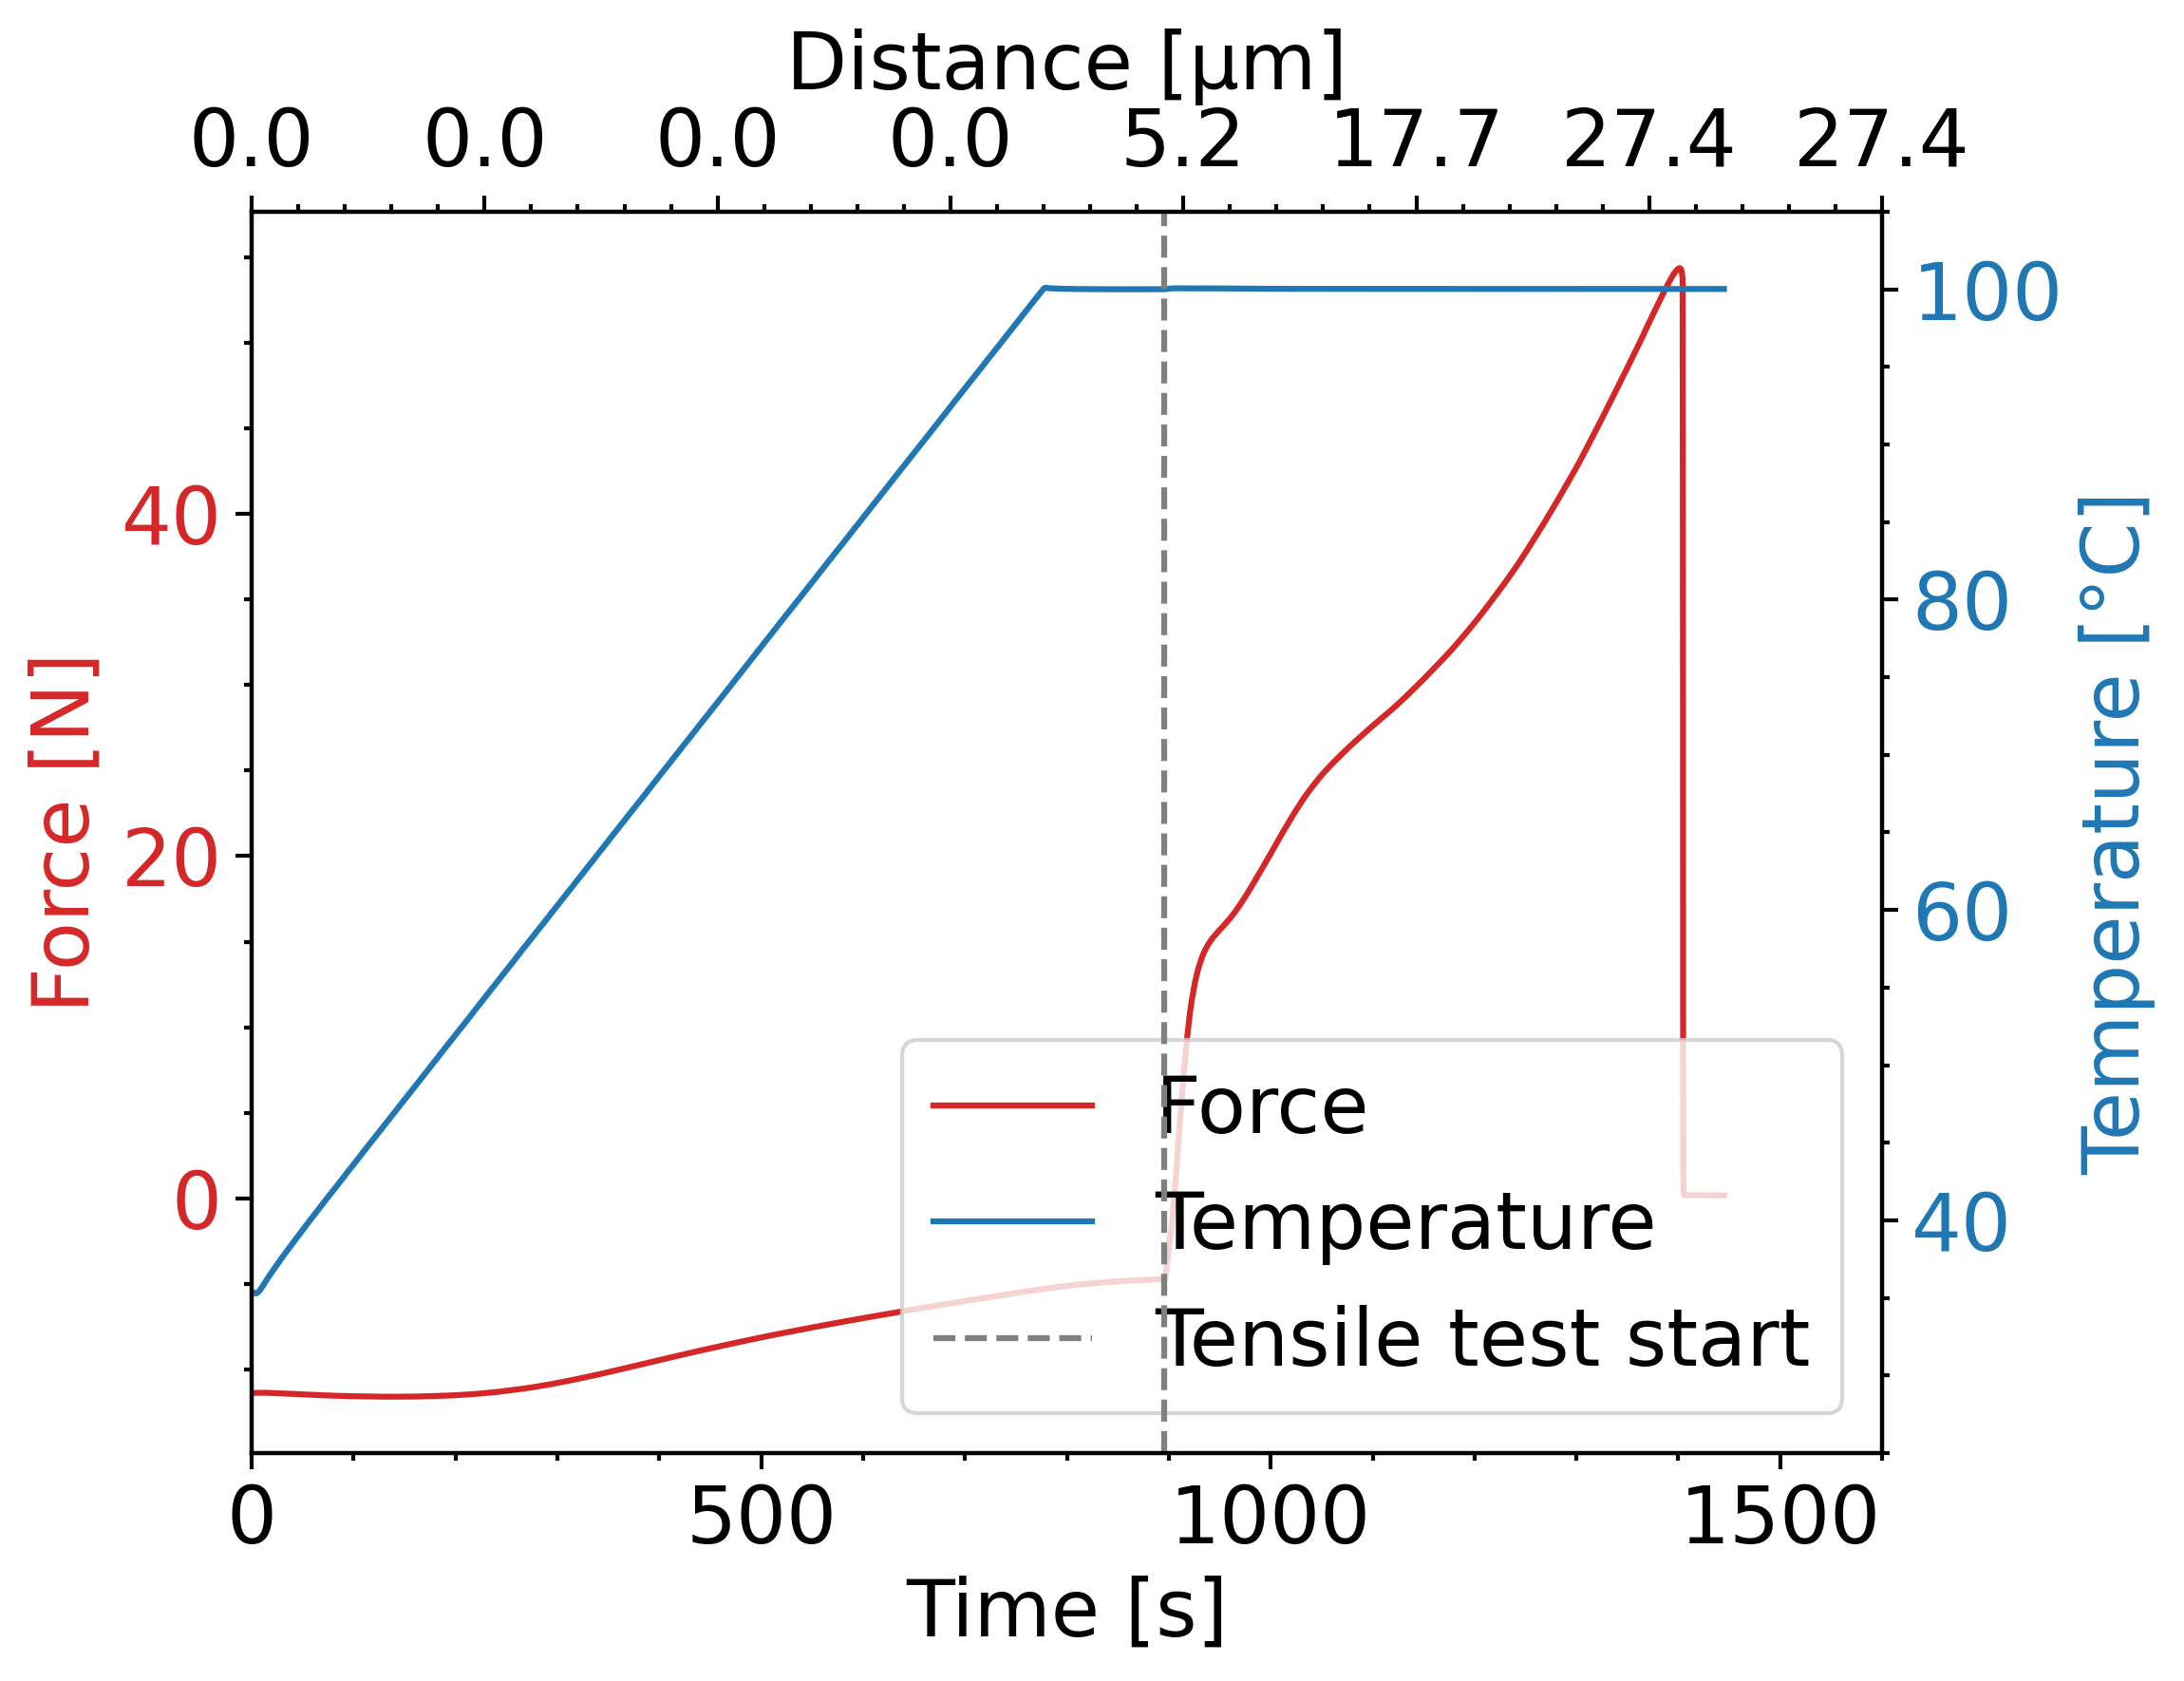

In [14]:
from matplotlib.pyplot import plot


base_path=r"/Users/akmaurya/OneDrive - Stanford/Data_01/Redesigned_Plastics/May_2025/linkam_stage/tensile_temperature_data"
    
plot_force_temperature_distance(base_path=base_path, file_keyword="LDPE_30C", T_hold_time=140, temp_ylim=(25, 35), figsize=(8, 6), dpi=300)
plot_force_temperature_distance(base_path=base_path, file_keyword="LDPE_50C", T_hold_time=405, temp_ylim=(25, 55), figsize=(8, 6), dpi=300)
plot_force_temperature_distance(base_path=base_path, file_keyword="LDPE_100C", T_hold_time=895, temp_ylim=(25, 105), figsize=(8, 6), dpi=300)

